## Nombre : Josue Alejandro Sauca Pucha
## Fecha : 14-06-2023

## Objetivos

    * Parte 1: El conjunto de datos
    * Parte 2: Gráficos de dispersión y variables correlacionables
    * Parte 3: Calcular la correlación con Python
    * Parte 4: Visualización</b>
## Situación/Contexto

**La correlación es una relación estadística importante que puede indicar si los valores variables tienen relación lineal.**

**En esta práctica de laboratorio aprenderá a utilizar Python para calcular la correlación. En la Parte 1 configurará el conjunto de datos. En la Parte 2 aprenderá a identificar si las variables de un determinado conjunto de datos son correlacionables. Finalmente, en la Parte 3 utilizará Python para calcular la correlación entre dos conjuntos de variables.**

## Recursos necesarios
    * 1 PC con acceso a Internet
    * Raspberry Pi versión 2 o superior
    * Bibliotecas de Python: pandas, numpy, matplotlib, seaborn
    * Archivos de datos: brainsize.txt
## Parte 1: El conjunto de datos

**Se utilizará un conjunto de datos que contiene un ejemplo de 40 estudiantes diestros de introducción a la psicología anglosajona de la una gran universidad de Southwestern. Los sujetos realizaron cuatro pruebas secundarias (vocabulario, similitudes, diseño de bloque y finalización de imagen) de la Escala Wechsler de Inteligencia para Adultos (1981) revisada. Los investigadores utilizaron imágenes por resonancia magnética (IRM) para determinar el tamaño del cerebro de los sujetos. También se incluyó información sobre el género y el tamaño del cuerpo (altura y peso). Los investigadores ocultaron los pesos de dos sujetos y la altura de un sujeto por razones de confidencialidad. Se realizaron dos modificaciones sencillas en el conjunto de datos:**

    1. Se reemplazaron los signos de interrogación utilizados para representar los puntos de datos ocultos descritos anteriormente por la cadena “NaN”. La sustitución se realizó porque Pandas no utiliza los signos de interrogación correctamente.

    2. Reemplazar todos los caracteres de tabulación por comas y así convertir el conjunto de datos en un conjunto de datos CSV.
**El conjunto de datos elaborado se guarda como brainsize.csv.**

**Paso 1: Carga del conjunto de datos desde un archivo
Antes de utilizar el conjunto de datos, debe cargarlo en la memoria.**

**En el siguiente código, la primera línea importa los módulos pandas y define pd como un descriptor que se refiere al módulo.**

**La segunda línea carga el archivo CSV del conjunto de datos en una variable llamada brainFile.**

**La tercera línea utiliza read_csv(), un método pandas para convertir el conjunto de datos CSV guardado en brainFile en una estructura de datos. La estructura de datos se almacena luego en la variable brainFrame.**

**Ejecute la siguiente celda para activar las funciones descritas.**

In [2]:
# Code cell 1
import pandas as pd
brainFile = './Data/brainsize.txt'
brainFrame = pd.read_csv(brainFile)

**Paso 2: Verificación de la estructura de datos**

**Para asegurarse de que la estructura de datos se haya cargado y creado, utilice el método head(). Otros métodos Pandas, head(), muestra las primeras cinco entradas de una estructura de datos.**

In [3]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Parte 2: Gráficos de dispersión y variables correlacionables

**Paso 1: El método Pandas describe().**

**El módulo de Pandas incluye el método describe() que realiza los mismos cálculos comunes sobre un conjunto de datos determinado. Además de proporcionar resultados comunes, incluidos el conteo, el promedio, la desviación estándar, el mínimo y el máximo, describe() también es una excelente manera de probar rápidamente la validez de los valores de la estructura de datos.**

**Ejecutar la siguiente celda para emitir los resultado computados por describe() según la estructura de datos brainFrame.**

In [4]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**Paso 2: Gráficos de dispersión**

**Los gráficos de dispersión son importantes al trabajar con correlaciones, ya que permiten una verificación visual rápida de la naturaleza de la relación entre las variables. Esta práctica de laboratorio utiliza el coeficiente de correlación de Pearson, que es sensible sólo a una relación lineal entre dos variables. Existen oros métodos de correlación más robustos, pero exceden el alcance de esta práctica de laboratorio.**

**a. Cargar los módulos requeridos.**

**Antes de trazar los gráficos, es necesario importar algunos módulos, como numpy y matplotlib. Ejecutar la siguiente celda para cargar estos módulos.**

In [5]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

**b. Separar los datos**

**Para asegurarse de que los resultados no se sesguen debido a las diferencias entre organismos femeninos y masculinos, la estructura de datos se divide en dos: una que contiene todas las entradas masculinas y otra solo con instancias femeninas.**

**A ejecutar la siguiente celda, se crean las dos nuevas estructuras de datos, menDf y womenDf; cada una incluye las entradas respectivas.**

In [9]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]
womenDf.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258


**c. Trazar los gráficos**

**Como el conjunto de datos incluye tres medidas diferentes de inteligencia (PIQ, FSIQ y VIQ), la primera línea que figura a continuación utiliza el método Pandas mean() para calcular el valor promedio entre las tres y guardar el resultado en la variable menMeanSmarts. Observe que la primera línea también se refiere a menDf, la estructura de datos filtrada que contiene sólo las entradas masculinas.**

**La segunda línea utiliza el método matplotlib scatter() para crear un gráfico de dispersión entre la variable menMeanSmarts variable y el atributo MRI_Count. El MRI_Count de este conjunto de datos se puede considerar como una medida del tamaño físico del cerebro de los sujetos.**

**La tercera línea simplemente muestra el gráfico.**

**La cuarta línea se utiliza para garantizar que el gráfico se muestre en esta libreta de anotaciones.**

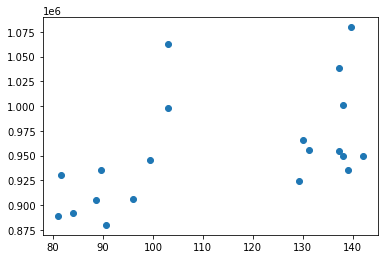

In [7]:
# Code cell 6
%matplotlib inline
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()

**Del mismo modo, el siguiente código crea un gráfico de dispersión para la estructura de datos filtrada solo para mujeres.**

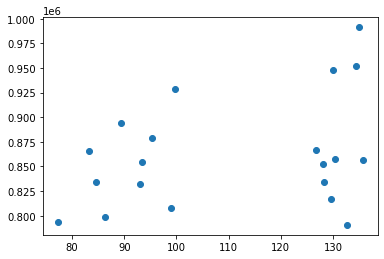

In [26]:
# Code cell 7
%matplotlib inline
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()

## Parte 3: Calcular la correlación con Python

**Paso 1: Cálculo de la correlación según brainFrame**

**El método pandas corr()) ofrece una manera fácil de calcular la correlación según una estructura de datos. Simplemente empleando el método según una estructura de datos, uno puede obtener la correlación entre todas las variables al mismo tiempo.**

In [11]:
# Code cell 8
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


**Observe la diagonal de izquierda a derecha en la tabla de correlación generada arriba. ¿Por qué la diagonal está plagada de 1? ¿Se trata de una coincidencia? Explique.**

Lo que sucede es que la libreria pandas.DataFrame.corr devuelve un valor de 1 a lo largo de las diagonales y sera simetrica, la correlación de una variable
consigo mismas es 1.

**Si continuamos observando la tabla de correlación que figura arriba, notaremos que los valores se duplican; los valores debajo de la diagonal 1 tienen valores homólogos duplicados sobre la diagonal 1. ¿Se trata de una coincidencia? Explique.**

Como se indico anteriormente la correlacion de una variable consigo mismas es 1,
entonces se debe tener en cuenta que se esta aplicando en una matriz simetrica
de M * N, entonces se debe tener en cuenta que la correlación ser igual, 
corr(M,N) = corr(N,M)

**Con el mismo método corr() es fácil calcular la correlación de las variables que contiene la estructura de datos solo femenina:**

In [12]:
# Code cell 9
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


**Y lo mismo se puede hacer para la estructura de datos solo masculina:**

In [13]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Parte 4: Visualización¶
**Paso 1: Instalar Seaborn**

**Para que sea más sencillo visualizar las correlaciones de datos, se pueden utilizar mapas de calor. Según los cuadros de color, los gráficos del mapa de calor pueden ayudar a identificar correlaciones al instante.**

**El módulo de Python denominado seaborn facilita el trazado de los gráficos de los mapas de calor.**

**Primero, ejecute la siguiente celda para descargar e instalar  seaborn.**

In [15]:
# Code cell 11
!pip install seaborn

**Paso 2: Preparar la estructura de datos para Seaborn**

**Si bien seaborn es muy práctico, tiene dificultades con algunos tipos de valores. Por ejemplo, cualquier número no entero o valor no flotante podría generar errores al intentar trazar gráficos con seaborn. Para evitar estos errores, las entradas que no son números deben eliminarse de las estructuras de datos. Si observamos las estructuras de datos, es fácil ver la columna problemática: Género. Como el género contiene valores que no son números (“masculino” o “femenino"), esa columna debe retirarse.**

**Si desglosamos el código de la celda, obtenemos lo siguiente:**

**Línea 1: importa el módulo seaborn recién instalado.**

**Línea 2: crea una copia de womenDf y elimina la columna “Género” de la estructura de datos womenNoGenderDf y así la prepara para seaborn.**

**Línea 3: crea una copia de menDf y elimina la columna “Género” de la estructura de datos menNoGenderDf y la prepara para seaborn.**

**Línea 4: convierte todos los valores de la estructura de datos womenNoGenderDf en float.**

**Línea 5: convierte todos los valores de la estructura de datos menNoGenderDf en float.**

In [16]:
# Code cell 12
import seaborn as sns

womenNoGenderDf = womenDf.drop('Gender', axis=1)
menNoGenderDf = menDf.drop('Gender', axis=1)

womenNoGenderDf = womenNoGenderDf[womenNoGenderDf.columns].astype(float)
menNoGenderDf = menNoGenderDf[menNoGenderDf.columns].astype(float)

**Paso 3: Trazado del mapa de calor de correlación**

**Ahora que las estructuras de datos están listas, se pueden trazar los mapas de calor. A continuación, se muestra un desglose del código de la celda:**

**Línea 1: genera una tabla de correlación basada en la estructura de datos womenNoGenderDf y la almacena en  wcorr.**

**Línea 2: utiliza el método seaborn heatmap() para generar y trazar el mapa de calor. Observe que heatmap() considera wcorr como un parámetro.**

**Línea 3: se usa para exportar y guardar el mapa de calor generado como imagen PNG. Si bien la línea 3 no está activa (tiene el caracter # como comentario que la precede y obliga al usuario a ignorarla), se guardó con fines informativos.**

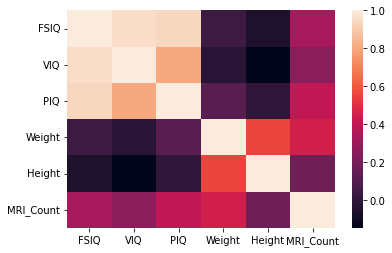

In [30]:
# Code cell 13
wcorr = womenNoGenderDf.corr()
sns.heatmap(wcorr)
plt.savefig('attribute_correlations_women.png')

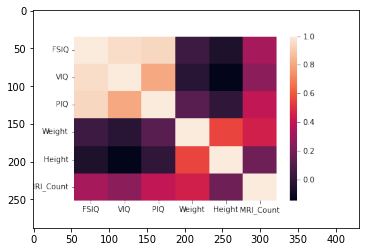

In [38]:
im = plt.imread('./attribute_correlations_women.png')
plt.imshow(im)
plt.show()

**Del mismo modo, el siguiente código crea y traza un mapa de calor para la estructura de datos masculina únicamente.**

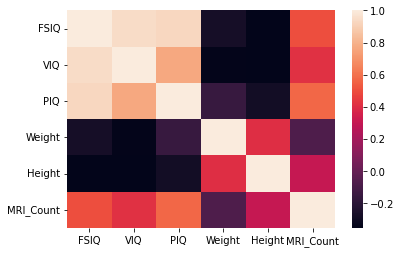

In [31]:
# Code cell 14
mcorr = menNoGenderDf.corr()
sns.heatmap(mcorr)
plt.savefig('attribute_correlations_man.png')

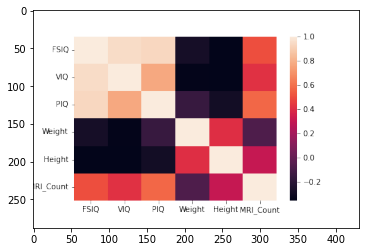

In [37]:
im = plt.imread('./attribute_correlations_man.png')
plt.imshow(im)
plt.show()

**Muchos pares de variables presentan una correlación cercana a cero. ¿Qué significa?**

Lo que sucede es que una correlacion debil es cercana a cero, esto quiere decir que una variable no esta fuertemente asociado con los cambios en otra variable.

**¿Por qué se separan los géneros?**

Estos se separan debido a las caracteristicas y comportamientos dentro de las mismas, tambien se debe a los patrones que tenga.
Esto se lo hace con el fin de evitar sesgos a la hora del tratamiento de los datos.

**¿Qué variables tienen una correlación más estrecha con el tamaño del cerebro (MRI_Count)? ¿Es eso lo que se espera? Explique.**

Las variables que tienen una estrecha correlacion son las de peso corporal y estatura, esto es por el hecho de si por ejemplo una personas tiene bastante peso y es pequeño eso esta mal a diferencia que si algo es alto esto si es diferente.
Tambien si una persona es as grande de atributos sera mas grande de cerebro.

**© 2017 Cisco y/o sus filiales. Todos los derechos reservados. Este documento es información pública de Cisco.**

In [40]:
brainFrame.to_csv('brainsize.csv')

In [41]:
!head brainsize.csv

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
